In [2]:
import pickle

longsubs = pickle.load(open('/home/anton/Documents/Tulane/Research/Work/ADNI/long_sub_scans_ts_tsfilt.pkl', 'rb'))

print(len(longsubs))

699


In [3]:
longsubs[0]['scans'][0]['year']

'2011'

In [11]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


In [22]:
import numpy as np

fcs = {}
a,b = np.triu_indices(264,1)

for sub in longsubs:
    name = sub['name']
    for scan in sub['scans']:
        year = scan['year']
        month = scan['month']
        if 'tsfilt' not in scan:
            print(f'Missing {name} {year} {month}')
            continue
        tsfilt = scan['tsfilt']
        p = np.corrcoef(tsfilt)
        if np.sum(np.isnan(p)) > 0:
            print(f'Bad {name} {year} {month}')
            continue
        p = remap(p)
        fcs[f'{name}-{year}-{month}'] = p[a,b]

print('Done')

Missing 002_S_0685 2012 07
Bad 002_S_2010 2010 10
Bad 002_S_2010 2011 01
Bad 002_S_2073 2010 12


/usr/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Missing 012_S_4026 2011 12
Bad 116_S_4855 2022 02
Missing 070_S_6229 2018 03
Bad 018_S_2133 2018 01
Bad 031_S_2022 2010 07
Bad 031_S_4021 2011 04
Done


In [23]:
pickle.dump(fcs, open('/home/anton/Documents/Tulane/Research/Work/ADNI/fcs.pkl', 'wb'))

print('Done')

Done


In [1]:
import pickle

fcs = pickle.load(open('/home/anton/Documents/Tulane/Research/Work/ADNI/fcs.pkl', 'rb'))

print('Done')

Done


In [2]:
import pandas as pd

df = pd.read_csv('/home/anton/Documents/Tulane/Research/Work/ADNI/DXSUM_03Mar2025.csv')

df

,PHASE,PTID,RID,VISCODE,VISCODE2,EXAMDATE,DIAGNOSIS,DXNORM,DXNODEP,DXMCI,...,DXODES,DXCONFID,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
0,ADNI1,011_S_0002,2,bl,bl,2005-09-29,1.0,1.0,-4.0,-4.0,...,-4.0,4.0,2,107,2005-10-01,NaN,NaN,NaN,NaN,2005-10-01 00:00:00.0
1,ADNI1,011_S_0003,3,bl,bl,2005-09-30,3.0,-4.0,-4.0,-4.0,...,-4.0,3.0,4,107,2005-10-01,NaN,NaN,NaN,NaN,2005-10-01 00:00:00.0
2,ADNI1,011_S_0005,5,bl,bl,2005-09-30,1.0,1.0,-4.0,-4.0,...,-4.0,4.0,6,107,2005-10-01,NaN,NaN,NaN,NaN,2005-10-01 00:00:00.0
3,ADNI1,011_S_0008,8,bl,bl,2005-09-30,1.0,1.0,-4.0,-4.0,...,-4.0,3.0,8,107,2005-10-01,NaN,NaN,NaN,NaN,2005-10-01 00:00:00.0
4,ADNI1,022_S_0007,7,bl,bl,2005-10-06,3.0,-4.0,-4.0,-4.0,...,-4.0,4.0,10,10,2005-10-06,NaN,NaN,NaN,NaN,2005-10-06 00:00:00.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14715,ADNI4,129_S_6288,6288,4_m12,m84,2025-02-26,1.0,NaN,NaN,NaN,...,NaN,NaN,70726,129,2025-02-27,2025-02-27,v1,e,0.0,2025-02-28 00:40:45.0
14716,ADNI4,006_S_10504,10504,4_sc,sc,2025-02-27,2.0,NaN,NaN,NaN,...,NaN,NaN,70755,6,2025-02-27,2025-02-27,v1,e,0.0,2025-02-28 00:40:45.0
14717,ADNI4,123_S_10547,10547,4_sc,sc,2025-02-28,1.0,NaN,NaN,NaN,...,NaN,NaN,70790,123,2025-02-28,2025-02-28,v1,e,0.0,2025-03-01 00:39:00.0
14718,ADNI4,381_S_10488,10488,4_sc,sc,2025-02-13,1.0,NaN,NaN,NaN,...,NaN,NaN,71049,381,2025-02-28,2025-02-28,v1,e,0.0,2025-03-01 00:39:00.0


In [4]:
import numpy as np

n = 42
admales = []
adfemales = []
cnmales = []
cnfemales = []

for k,v in fcs.items():
    parts = k.split('-')
    subid = parts[0]
    year = parts[1]
    month = parts[2]
    gen = df2[df2['PTID'] == subid]['PTGENDER'].values[0]
    rows = df[df['PTID'] == subid]
    found = False
    for row in rows.iterrows():
        exam = row[1]['EXAMDATE']
        try:
            dateparts = exam.split('-')
        except: 
            continue
        diag = row[1]['DIAGNOSIS']
        if diag == 2:
            continue
        if year == dateparts[0] and month == dateparts[1]:
            if gen == 1.0 and diag == 1:
                cnmales.append(v)
            elif gen == 2.0 and diag == 1:
                cnfemales.append(v)
            elif gen == 1.0 and diag == 3:
                admales.append(v)
            elif gen == 2.0 and diag == 3:
                adfemales.append(v)
    # if not found:
    #     print(f'Not found {k}')

# x = np.stack(x)
# y = np.array(y)

print('Done')

Done


In [6]:
print([len(x) for x in [admales, adfemales, cnmales, cnfemales]])

[87, 68, 235, 347]


168
0.8235294117647058


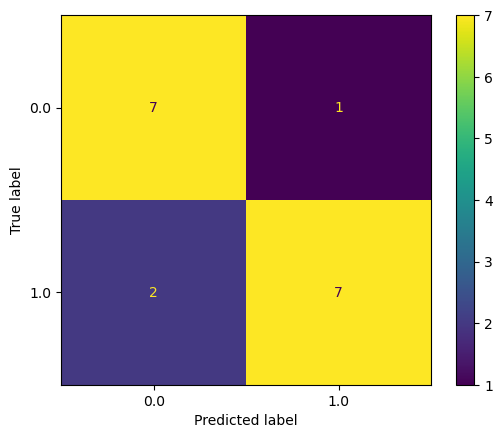

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

# n = np.sum(y)
# print(n)
# idcs = np.arange(len(x))
# np.random.shuffle(idcs)

# xx = x[idcs]
# yy = y[idcs]

# x0 = xx[yy == 0][:n]
# x1 = xx[yy == 1]
# y0 = yy[yy == 0][:n]
# y1 = yy[yy == 1]

# xx = np.concatenate([x0, x1])
# yy = np.concatenate([y0, y1])

np.random.shuffle(admales)
np.random.shuffle(adfemales)
np.random.shuffle(cnmales)
np.random.shuffle(cnfemales)

x = np.concatenate([admales[:n], adfemales[:n], cnmales[:n], cnfemales[:n]])
y = np.concatenate([np.ones(n*2), np.zeros(n*2)])

print(len(x))

x0 = x[y == 0]
x1 = x[y == 1]

xtr, xt, ytr, yt = train_test_split(x, y, stratify=y, train_size=0.9)

reg = LogisticRegression(C=1000).fit(xtr, ytr)
yhat = reg.predict(xt)
print(np.sum(yhat == yt)/len(yt))

disp = ConfusionMatrixDisplay.from_predictions(yt, yhat)

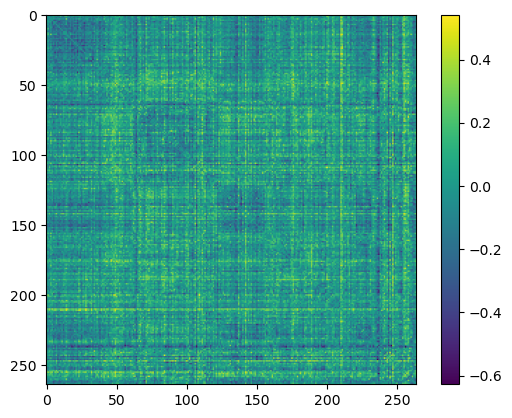

In [61]:
w = reg.coef_[0]

wx0 = np.einsum('nx,x->x', x0, w) + reg.intercept_
wx1 = np.einsum('nx,x->x', x1, w) + reg.intercept_

import matplotlib.pyplot as plt

ww = vec2mat(w)

plt.imshow(ww)
plt.colorbar()

In [12]:
print(np.sum(ww))

44075.95597004677


In [26]:
weights = {'intercept': reg.intercept_, 'coef': reg.coef_[0]}
num = 'balanced'

pickle.dump(weights, open(f'/home/anton/Documents/Tulane/Research/Work/ADNI/weights{num}.pkl', 'wb'))

print('Done')

Done


In [8]:
import scipy.stats as stats

def corr_feats(feat, var, typ='Pearson', bonf=True, bonfMult=None):
    feat = feat - np.mean(feat, axis=0, keepdims=True)
    var = var - np.mean(var)
    sigma_fv = np.einsum('ab,a->b',feat,var)
    sigma_ff = np.einsum('ab,ab->b',feat,feat)
    sigma_vv = np.einsum('a,a->',var,var)
    rho = sigma_fv/(sigma_ff*sigma_vv)**0.5
    n = feat.shape[0]
    m = feat.shape[1]
    df = n-2
    t = rho*(df/(1-rho**2))**0.5
    t[t < 0] = -t[t < 0]
    p = (1-stats.t.cdf(t, df))*2
    if bonf:
        p *= m if bonfMult is None else bonfMult
    p[p > 1] = 1
    p[p < 1e-5] = 1e-5
    scalar = feat@rho
    tot_rho = np.corrcoef(var, scalar)[0,1]
    tot_t = tot_rho*(df/(1-tot_rho**2))**0.5
    tot_p = (1-stats.t.cdf(tot_t, df))*2
    return rho, np.log10(p), df, tot_rho, np.log10(tot_p)

rho, p, df, tot_rho, tot_p = corr_feats(x, y)

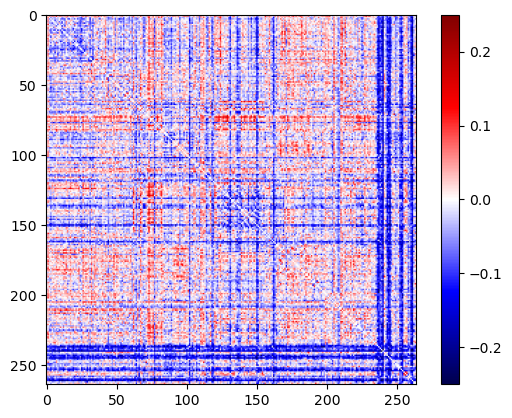

In [17]:
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

norm = TwoSlopeNorm(vmax=0.25, vmin=-0.25, vcenter=0)

plt.imshow(vec2mat(rho), norm=norm, cmap='seismic')
plt.colorbar()

In [13]:
print(tot_rho, tot_p)

0.23209962845724524 -2.607810628028356


In [18]:
pickle.dump(rho, open('/home/anton/Documents/Tulane/Research/Work/ADNI/corrBalanced.pkl', 'wb'))

print('Done')

Done


In [82]:
adsubs.intersection(cnsubs)

{'002_S_4225', '002_S_4262', '129_S_4422', '135_S_6411'}

In [3]:
df2 = pd.read_csv('/home/anton/Documents/Tulane/Research/Work/ADNI/PTDEMOG_04Mar2025.csv')

df2

,PHASE,PTID,RID,VISCODE,VISCODE2,VISDATE,PTSOURCE,PTGENDER,PTDOB,PTDOBYY,...,PTBIRPR,PTBIRGR,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
0,ADNI1,011_S_0002,2,sc,sc,2005-08-17,1.0,1.0,04/1931,1931.0,...,NaN,NaN,18,107,2005-08-17,NaN,NaN,NaN,NaN,2005-08-17 00:00:00.0
1,ADNI1,022_S_0001,1,f,f,2005-08-18,1.0,2.0,12/1944,1944.0,...,NaN,NaN,20,10,2005-08-18,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
2,ADNI1,011_S_0003,3,sc,sc,2005-08-18,1.0,1.0,05/1924,1924.0,...,NaN,NaN,22,107,2005-08-18,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
3,ADNI1,022_S_0004,4,sc,sc,2005-08-18,1.0,1.0,01/1938,1938.0,...,NaN,NaN,24,10,2005-08-18,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
4,ADNI1,011_S_0005,5,sc,sc,2005-08-23,1.0,1.0,12/1931,1931.0,...,NaN,NaN,26,107,2005-08-23,NaN,NaN,NaN,NaN,2005-08-23 00:00:00.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5757,ADNI4,381_S_10492,10492,4_sc,sc,2025-02-14,1.0,2.0,02/1964,1964.0,...,1.0,1.0,71051,381,2025-02-28,2025-02-28,v1,e,0.0,2025-03-01 00:40:05.0
5758,ADNI4,114_S_10468,10468,4_sc,sc,2025-02-26,1.0,1.0,07/1951,1951.0,...,1.0,1.0,71122,114,2025-02-28,2025-02-28,v1,e,0.0,2025-03-01 00:40:05.0
5759,ADNI4,037_S_10171,10171,4_sc,sc,2024-08-19,NaN,NaN,NaN,NaN,...,2.0,2.0,71207,37,2025-02-28,2025-02-28,v1,e,1.0,2025-03-01 00:40:05.0
5760,ADNI4,036_S_10545,10545,4_sc,sc,2025-02-26,1.0,1.0,05/1949,1949.0,...,0.0,0.0,71230,36,2025-03-03,2025-03-03,v1,e,0.0,2025-03-04 00:40:16.0


In [95]:
gender = {1.0: 0, 2.0: 0, float('NaN'): 0}
ages = []
males = set()
females = set()

for sub in adsubs:
    gen = df2[df2['PTID'] == sub]['PTGENDER'].values[0]
    # gender[gen] += 1
    # vis = df2[df2['PTID'] == sub]['VISDATE'].values[0]
    # vis = int(vis.split('-')[0])
    # dob = df2[df2['PTID'] == sub]['PTDOBYY'].values[0]
    # dob = int(dob)
    # ages.append(vis-dob)

# print(np.mean(ages))
# print(np.std(ages))

73.13684210526316
7.091300120296833


In [92]:
gender

{1.0: 123, 2.0: 179, nan: 0}